**LIBRERIAS**

In [3]:
import pickle
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

**CARGA DE LOS ARCHIVOS PARQUET**

In [4]:

# Ruta del archivo Parquet
ruta_business_parquet = r'D:\Yelp\raw_data_parquet\business.parquet'

# Cargar el archivo Parquet en un DataFrame
df_business = pd.read_parquet(ruta_business_parquet)

#Ruta del archivo Parquet
ruta_checkin_parquet = r'D:\Yelp\raw_data_parquet\checkin.parquet'

# Cargar el archivo Parquet en un DataFrame
df_checkin = pd.read_parquet(ruta_checkin_parquet)

#Ruta del archivo Parquet
ruta_tip_parquet = r'D:\Yelp\raw_data_parquet\tip.parquet'

# Cargar el archivo Parquet en un DataFrame
df_tip = pd.read_parquet(ruta_tip_parquet)



Escogí el chunk 3 de Review, y el chunk 1 de Users para hacer el EDA

In [5]:
#Ruta del archivo Parquet
ruta_reviews_parquet = r'D:\Yelp\raw_data_parquet\Reviews\chunk_3.parquet'

# Cargar el archivo Parquet en un DataFrame
df_reviews = pd.read_parquet(ruta_reviews_parquet)


In [6]:

#Ruta del archivo Parquet
ruta_users_parquet = r'D:\Yelp\raw_data_parquet\Users\user-002_chunk_1.parquet'

# Cargar el archivo Parquet en un DataFrame
df_users = pd.read_parquet(ruta_users_parquet)

## Limpieza dataset Bussiness YELP ##

In [7]:
# En el EDA previo se ha decidido en conjunto dejar los estados  'FL', 'PA' y 'TN'
estados_deseados = ['FL', 'PA' ,'TN']

# Filtrar el DataFrame df_business para mantener solo las filas donde el estado está en la lista estados_deseados
df_business_filtrado = df_business[df_business['state'].isin(estados_deseados)]

In [8]:
df_business_filtrado.shape

(72424, 14)

In [9]:
df_business_filtrado.isnull().sum()

business_id         0
name                0
address             0
city                0
state               0
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes       6683
categories         55
hours           11241
dtype: int64

In [10]:
df_business_filtrado[["attributes", "categories", "hours"]][:5]

,attributes,categories,hours
index,,,
6,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Sporting Goods, Fashion, Shoe Stores, Shopping...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ..."
7,None,"Synagogues, Religious Organizations","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ..."
8,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...","Pubs, Restaurants, Italian, Bars, American (Tr...",None
10,"{'RestaurantsPriceRange2': '2', 'BikeParking':...","Department Stores, Shopping, Fashion","{'Monday': '9:30-21:30', 'Tuesday': '9:30-21:3..."
12,"{'RestaurantsReservations': 'False', 'Restaura...","American (Traditional), Restaurants, Diners, B...","{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ..."


Tras examinar datos nulos, que representan el 5,1% del dataset; distribuidos en tres columnas **`Altura`**, **`Dirección Normalizada`**, **`Cruce`** y **`Calle`**. 
- Para el caso de **`attributes`** tiene 6683 datos nulos, un 9.27% .
- Para el caso de  **`categories`** tiene 55 datos nulos, un 0.075% de los datos de la columna 
- Para el caso de **`hours`** tiene 11241 nulos, siendo el 15.52% del los datos de la columna.

Analizando los datos de la `hours` se procede a eliminarla debido a la gran cantidad de faltantes y no existiendo manera de poder rellenar los datos; 
La columna `categories` no tiene posibilidad de completarse con las columnas del dataset; pero contiene solo 0.075% de nulos por lo se conserva de esta manera.

In [11]:
df_business_filtrado.drop(columns=['hours'],inplace=True)
df_business_filtrado.info()
df_business_filtrado.columns

<class 'pandas.core.frame.DataFrame'>
Index: 72424 entries, 6 to 150345
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   72424 non-null  object 
 1   name          72424 non-null  object 
 2   address       72424 non-null  object 
 3   city          72424 non-null  object 
 4   state         72424 non-null  object 
 5   postal_code   72424 non-null  object 
 6   latitude      72424 non-null  float64
 7   longitude     72424 non-null  float64
 8   stars         72424 non-null  float64
 9   review_count  72424 non-null  int64  
 10  is_open       72424 non-null  int64  
 11  attributes    65741 non-null  object 
 12  categories    72369 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 7.7+ MB


C:\Users\Administrador\AppData\Local\Temp\ipykernel_15140\2741161340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_business_filtrado.drop(columns=['hours'],inplace=True)


Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories'],
      dtype='object')

## Transformación dataset Bussiness YELP

In [12]:
# Consultar el tipo de dato de cada columna
tipos_de_dato = df_business_filtrado.dtypes

# Imprimir los tipos de dato de cada columna
print(tipos_de_dato)

business_id      object
name             object
address          object
city             object
state            object
postal_code      object
latitude        float64
longitude       float64
stars           float64
review_count      int64
is_open           int64
attributes       object
categories       object
dtype: object


**EL DATASET DE BUSINESS**

In [13]:
df_business_filtrado.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories
index,,,,,,,,,,,,,
6,n_0UpQx1hsNbnPUSlodU8w,Famous Footwear,"8522 Eager Road, Dierbergs Brentwood Point",Brentwood,PA,63144,38.627695,-90.340465,2.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Sporting Goods, Fashion, Shoe Stores, Shopping..."
7,qkRM_2X51Yqxk3btlwAQIg,Temple Beth-El,400 Pasadena Ave S,St. Petersburg,PA,33707,27.766590,-82.732983,3.5,5,1,None,"Synagogues, Religious Organizations"
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,TN,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...","Pubs, Restaurants, Italian, Bars, American (Tr..."
10,UJsufbvfyfONHeWdvAHKjA,Marshalls,21705 Village Lakes Sc Dr,Land O' Lakes,FL,34639,28.190459,-82.457380,3.5,6,1,"{'RestaurantsPriceRange2': '2', 'BikeParking':...","Department Stores, Shopping, Fashion"
12,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,TN,46227,39.637133,-86.127217,2.5,28,1,"{'RestaurantsReservations': 'False', 'Restaura...","American (Traditional), Restaurants, Diners, B..."


In [14]:
df_business_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72424 entries, 6 to 150345
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   72424 non-null  object 
 1   name          72424 non-null  object 
 2   address       72424 non-null  object 
 3   city          72424 non-null  object 
 4   state         72424 non-null  object 
 5   postal_code   72424 non-null  object 
 6   latitude      72424 non-null  float64
 7   longitude     72424 non-null  float64
 8   stars         72424 non-null  float64
 9   review_count  72424 non-null  int64  
 10  is_open       72424 non-null  int64  
 11  attributes    65741 non-null  object 
 12  categories    72369 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 7.7+ MB


In [15]:
# Suponiendo que df_business_filtrado es tu DataFrame
# Verificar el rango de valores
valid_lat_range = (-90, 90)
valid_long_range = (-180, 180)

# Verificar si las coordenadas están dentro del rango válido
valid_lat = df_business_filtrado['latitude'].between(*valid_lat_range)
valid_long = df_business_filtrado['longitude'].between(*valid_long_range)

# Filtrar las filas que no cumplen con los rangos válidos
invalid_coords = df_business_filtrado[~(valid_lat & valid_long)]

# Mostrar las filas con coordenadas inválidas
print("Coordenadas inválidas:")
print(invalid_coords)

Coordenadas inválidas:
Empty DataFrame
Columns: [business_id, name, address, city, state, postal_code, latitude, longitude, stars, review_count, is_open, attributes, categories]
Index: []


## Limpieza dataset TIPS YELP ##

In [16]:
df_tip.shape

(908915, 5)

In [17]:
df_tip.isnull().sum()

user_id             0
business_id         0
text                0
date                0
compliment_count    0
dtype: int64

In [18]:
df_tip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908915 entries, 0 to 908914
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_id           908915 non-null  object
 1   business_id       908915 non-null  object
 2   text              908915 non-null  object
 3   date              908915 non-null  object
 4   compliment_count  908915 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 34.7+ MB


In [19]:
df_tip.head() 

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


## Transformación dataset TIPS YELP

In [20]:
# Suponiendo que df_tip es tu DataFrame
# Convierte la columna 'date' a tipo datetime si aún no lo has hecho
df_tip['date'] = pd.to_datetime(df_tip['date'])

# Filtrar los registros para los años 2010 a 2021
df_tip_filtrado = df_tip[(df_tip['date'].dt.year >= 2010) & (df_tip['date'].dt.year <= 2021)]

df_tip_filtrado.shape

(907325, 5)

## Limpieza dataset REVIEWS YELP ##

In [21]:
df_reviews.shape

(1000000, 9)

In [22]:
df_reviews.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [23]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   review_id    1000000 non-null  object        
 1   user_id      1000000 non-null  object        
 2   business_id  1000000 non-null  object        
 3   stars        1000000 non-null  int64         
 4   useful       1000000 non-null  int64         
 5   funny        1000000 non-null  int64         
 6   cool         1000000 non-null  int64         
 7   text         1000000 non-null  object        
 8   date         1000000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 68.7+ MB


In [24]:
df_reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,HcA750mPTtKUYuWfHR7vAA,3vofzamIMkrS0PPf5aSmRQ,7_1GqlDlbkShY0az7J0XNg,4,0,0,0,So this place has the best OUTDOOR SEATING in ...,2011-08-15 08:16:03
1,4C_k3xCaSdFXcotVICxYLg,tCRK0DNqtudWuLEq3IInhA,Sd8NrlgB6SY6GEtIjPupfA,4,0,0,0,Great food and prices. I recommend the gyro. P...,2014-10-18 22:46:47
2,LInUEmtPAqlcqlk8DfrD9Q,60RKNAZwY5EUooJf624aKw,ikONTzFKwachQtFtoMGeIQ,4,3,0,5,"Excellent pizza, salad and service! I came for...",2018-01-18 04:07:13
3,Dkl-JP_lPuDdE1ka8KMBFA,3jG-b8U7bnE1FPiCl_CE-Q,XXFW9msW3P-p6t6vV0cpeg,1,1,1,1,This place is just terrible!!! We read the re...,2014-02-16 03:56:18
4,JgZFJVhMiOxcSWK2QAub6g,qwy5ZpzXgWCB2TMDmCpKLQ,B2Rk_FNhgFF-XOwesQw7FA,1,0,0,0,I took my family of four to dinner and the foo...,2014-08-31 15:52:03


## Transformación dataset REVIEWS YELP

In [25]:
# Suponiendo que df_tip es tu DataFrame
# Convierte la columna 'date' a tipo datetime si aún no lo has hecho
df_reviews['date'] = pd.to_datetime(df_reviews['date'])

# Filtrar los registros para los años 2010 a 2021
df_reviews_filtrado = df_reviews[(df_reviews['date'].dt.year >= 2010) & (df_reviews['date'].dt.year <= 2021)]

df_reviews_filtrado.shape

(977067, 9)

In [26]:
df_reviews_filtrado = df_reviews_filtrado.drop(columns=['funny'])

In [27]:
df_reviews_filtrado.shape

(977067, 8)

In [28]:
# Aplicamos el análisis de sentimiento usando VaderSentiment en el campo Text.
analyzer = SentimentIntensityAnalyzer()
df_reviews_filtrado['sentiment_score'] = df_reviews_filtrado['text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [29]:
df_reviews_filtrado.shape

(977067, 9)

## Limpieza dataset USERS YELP ##

In [30]:
df_users.shape

(1000000, 22)

In [31]:
df_users.isnull().sum()

user_id               0
name                  0
review_count          0
yelping_since         0
useful                0
funny                 0
cool                  0
elite                 0
friends               0
fans                  0
average_stars         0
compliment_hot        0
compliment_more       0
compliment_profile    0
compliment_cute       0
compliment_list       0
compliment_note       0
compliment_plain      0
compliment_cool       0
compliment_funny      0
compliment_writer     0
compliment_photos     0
dtype: int64

In [32]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 22 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   user_id             1000000 non-null  object 
 1   name                1000000 non-null  object 
 2   review_count        1000000 non-null  int64  
 3   yelping_since       1000000 non-null  object 
 4   useful              1000000 non-null  int64  
 5   funny               1000000 non-null  int64  
 6   cool                1000000 non-null  int64  
 7   elite               1000000 non-null  object 
 8   friends             1000000 non-null  object 
 9   fans                1000000 non-null  int64  
 10  average_stars       1000000 non-null  float64
 11  compliment_hot      1000000 non-null  int64  
 12  compliment_more     1000000 non-null  int64  
 13  compliment_profile  1000000 non-null  int64  
 14  compliment_cute     1000000 non-null  int64  
 15  compliment_list 

In [33]:
df_users.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,fbYIDgRxm5s6gqndZBd8VA,Allison,35,2009-10-07 23:02:25,29,3,10,,"hLSxHbq2uuSGC7pMaPVcXw, LMsLF2Y1-wcU6jKk6oOZ8Q...",3,...,0,0,0,0,0,1,1,1,1,0
1,vdBqmss5ugQwp6WMCiyU7A,Brad,5,2011-05-11 14:20:37,0,0,0,,"oAW8iOHb6iEdrjW5CcZD6Q, 8W6QgX67Zf-h_3en4UPNpQ...",0,...,0,0,0,0,0,0,0,0,0,0
2,QNB9I0Bo9K14237ao4yrpA,Tyler,2,2011-09-25 02:56:14,1,0,0,,"Sb139v26otiveywG0UtDMQ, a-cVe782K7GwYcMpDNat3g...",0,...,0,0,0,0,0,0,1,1,0,0
3,H6pf_6tRiJJfLDatPgtcKQ,Sue,2,2011-07-15 16:52:07,0,0,0,,"aYM9A01atbRFqJfcbcZncA, qNxzI0Qke5XCY4_Hd1o-sQ...",0,...,0,0,0,0,0,0,0,0,0,0
4,WEjzjAd1xRSdHpIS1aecPA,Danielle,43,2009-08-28 03:58:05,98,50,50,,"0nPh2NKEBngjZ57jACy-Aw, 5Ak87KzB409zNImUehS7EQ...",2,...,0,0,0,0,1,2,0,0,1,0


## Transformación del dataset USER Yelp

In [34]:
df_users['yelping_since']=pd.to_datetime(df_users['yelping_since'])

In [35]:
# Filtrar los registros para los años 2010 a 2021
df_users_filtrado = df_users[(df_users['yelping_since'].dt.year >= 2010) & (df_users['yelping_since'].dt.year <= 2021)]

df_reviews_filtrado.shape

(977067, 9)

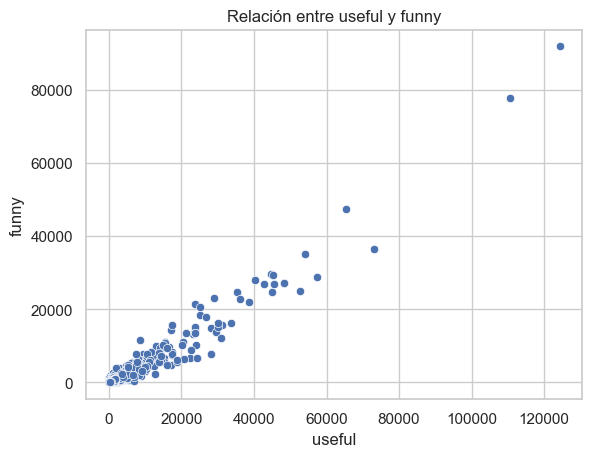

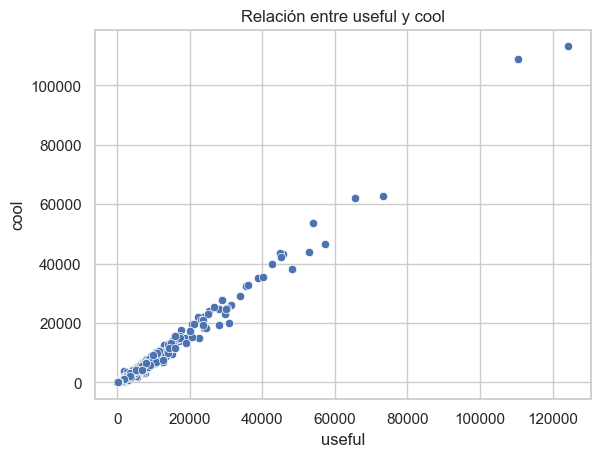

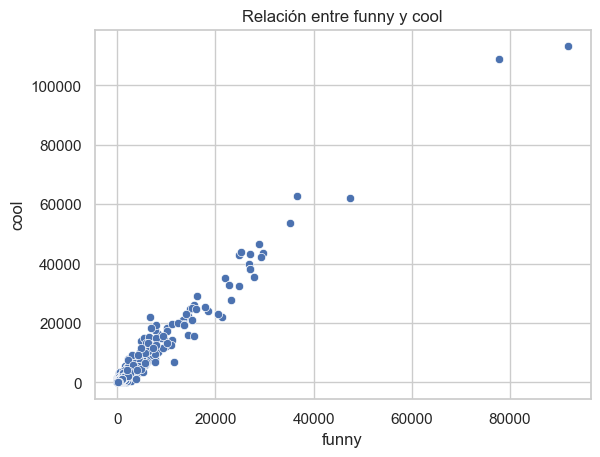

In [38]:
# Configuración para mejorar la estética de los gráficos
sns.set(style="whitegrid")

# Lista de columnas numéricas para histogramas
numeric_columns = ['useful', 'funny', 'cool']

# Crear scatter plots para cada combinación de variables numéricas
for i in range(len(numeric_columns)):
    for j in range(i + 1, len(numeric_columns)):
        sns.scatterplot(data=df_users_filtrado, x=numeric_columns[i], y=numeric_columns[j])
        plt.title(f'Relación entre {numeric_columns[i]} y {numeric_columns[j]}')
        plt.xlabel(numeric_columns[i])
        plt.ylabel(numeric_columns[j])
        plt.show()

In [ ]:


# Configuración para mejorar la estética de los gráficos
sns.set(style="whitegrid")

# Lista de columnas numéricas para histogramas
numeric_columns = ['useful', 'funny', 'cool']

# Crear scatter plots para cada combinación de variables numéricas
for i in range(len(numeric_columns)):
    for j in range(i + 1, len(numeric_columns)):
        sns.scatterplot(data=df_users_filtrado, x=numeric_columns[i], y=numeric_columns[j])
        plt.title(f'Relación entre {numeric_columns[i]} y {numeric_columns[j]}')
        plt.xlabel(numeric_columns[i])
        plt.ylabel(numeric_columns[j])
        plt.show()

In [39]:
df_users_filtrado.drop(columns=['funny', 'cool', 'compliment_funny'],inplace=True)

C:\Users\Administrador\AppData\Local\Temp\ipykernel_15140\3310502239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_users_filtrado.drop(columns=['funny', 'cool', 'compliment_funny'],inplace=True)


In [40]:
df_users_filtrado.head()

,user_id,name,review_count,yelping_since,useful,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_writer,compliment_photos
1,vdBqmss5ugQwp6WMCiyU7A,Brad,5,2011-05-11 14:20:37,0,,"oAW8iOHb6iEdrjW5CcZD6Q, 8W6QgX67Zf-h_3en4UPNpQ...",0,4.20,0,0,0,0,0,0,0,0,0,0
2,QNB9I0Bo9K14237ao4yrpA,Tyler,2,2011-09-25 02:56:14,1,,"Sb139v26otiveywG0UtDMQ, a-cVe782K7GwYcMpDNat3g...",0,5.00,0,0,0,0,0,0,0,1,0,0
3,H6pf_6tRiJJfLDatPgtcKQ,Sue,2,2011-07-15 16:52:07,0,,"aYM9A01atbRFqJfcbcZncA, qNxzI0Qke5XCY4_Hd1o-sQ...",0,4.50,0,0,0,0,0,0,0,0,0,0
7,szfKGmb7ToTiWJxrv4D8mQ,Dave,32,2010-06-10 15:33:48,20,,"4GPvnY5IG30mp0HhRt4L3A, A0szYrXWV_X09wSDs8p5jA...",0,3.88,0,0,0,0,0,0,0,1,0,0
11,FukndPpc6L9Ravpit6nzSA,Bruce,8,2010-04-25 21:16:52,13,,"QT7PYg4Y_Qd8KR5kSngqwg, aT5shoOPaUP6DUhghVbXiw...",0,1.60,0,0,0,0,0,1,2,0,0,0
